In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [9]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
test_x = test_x.astype('float32')
test_x = (test_x - 127.5) / 127.5
classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# ACGAN

## S1

In [12]:
discriminator = load_model('./baseClf.h5')
_eval = discriminator.evaluate(test_x, test_y)
predictions = discriminator.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 1s 2ms/step - loss: 1.0686 - sparse_categorical_accuracy: 0.7611


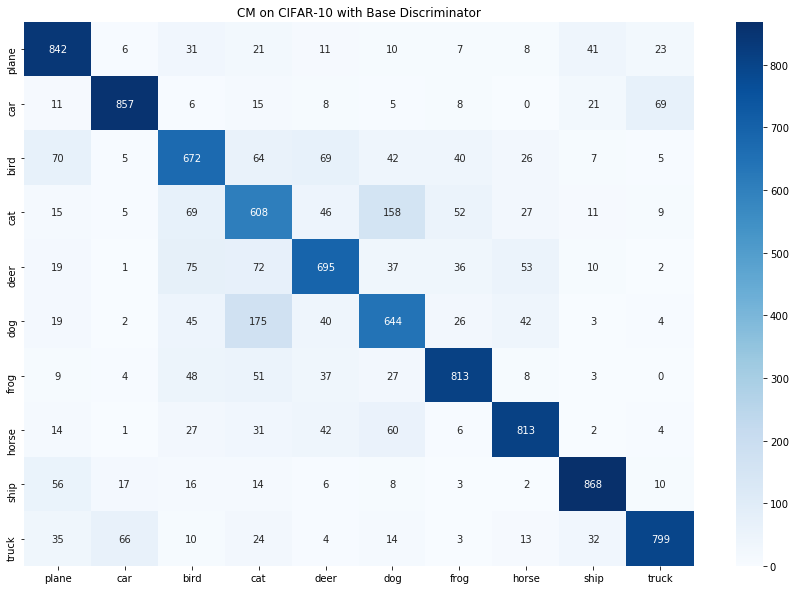

In [13]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on CIFAR-10 with Base Discriminator')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)

## S2

In [25]:
discriminator = load_model('./baseClf_gan.h5')
_eval = discriminator.evaluate(test_x, test_y)
predictions = discriminator.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 1s 2ms/step - loss: 1.7386 - sparse_categorical_accuracy: 0.6918


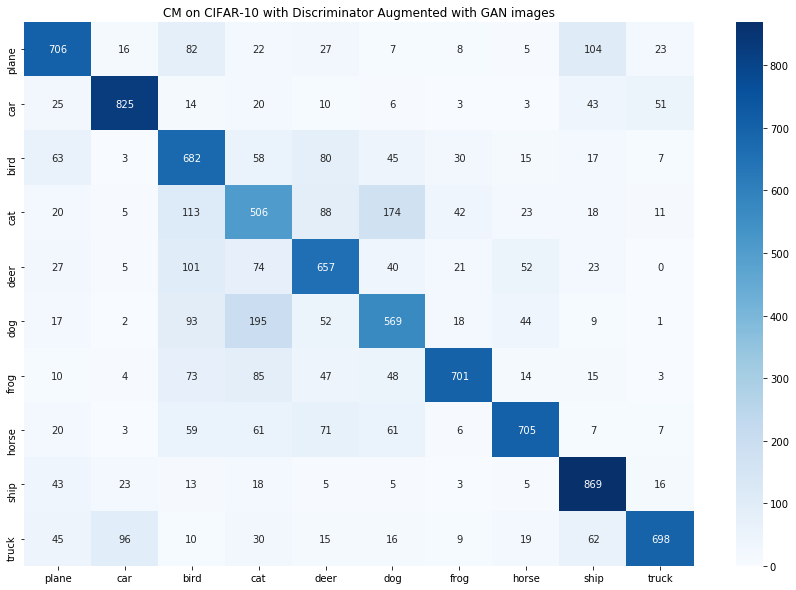

In [26]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on CIFAR-10 with Discriminator Augmented with GAN images')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)

## S3

In [28]:
#measure accuracy on CIFAR10 test data
discriminator = '../../ACGAN/history/acgan-cifar10-2/training_checkpoints/discriminator-e100.h5'
discriminator = load_model(discriminator)
_eval = discriminator.evaluate(test_x, test_y)
_, predictions = discriminator.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 1s 3ms/step - loss: -3.9448 - out_fake_loss: -4.8267 - out_aux_loss: 0.8819 - out_fake_accuracy: 0.0980 - out_aux_out_aux_sparse_categorical_accuracy: 0.7570


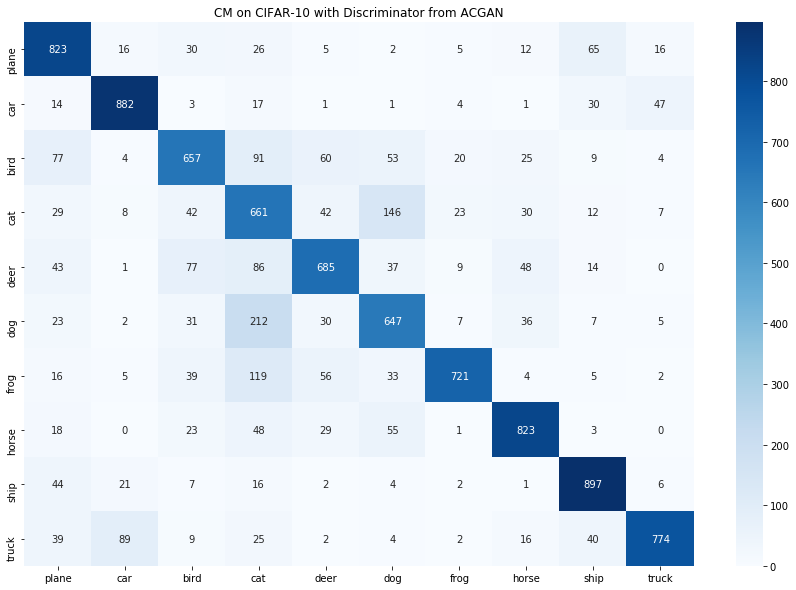

In [29]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on CIFAR-10 with Discriminator from ACGAN')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)